In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"C:\Users\yasho\Downloads\Online_Payments_Fraud_Detection\Dataset\Final_Enhanced_Transaction_Log.csv")

In [3]:
df.shape

(1048575, 23)

In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,transaction_gap,origin_to_dest_ratio,zero_balance_sender,zero_balance_receiver,high_risk_transaction_type
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0,1.784666e+05,2.390622e+04,3.235849e-01,3.601211e-01,4.390664e-01
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0,2.812390e+05,1.216023e+05,4.678439e-01,4.800355e-01,4.962734e-01
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.680000e-07,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.518460e+03,1.668557e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0,6.748902e+04,9.295320e-01,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0,2.508190e+05,8.384570e+03,1.000000e+00,1.000000e+00,1.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0,6.388051e+06,1.000000e+07,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
df.isnull().sum()

step                          0
type                          0
amount                        0
nameOrig                      0
oldbalanceOrg                 0
newbalanceOrig                0
nameDest                      0
oldbalanceDest                0
newbalanceDest                0
isFraud                       0
isFlaggedFraud                0
city                          0
state                         0
country                       0
ip_address                    0
transaction_gap               0
origin_to_dest_ratio          0
zero_balance_sender           0
zero_balance_receiver         0
high_risk_transaction_type    0
device_id                     0
channel_type                  0
device_type                   0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
# Count of unique values per column
df.nunique()

step                               95
type                                5
amount                        1009606
nameOrig                      1048317
oldbalanceOrg                  391033
newbalanceOrig                 440792
nameDest                       449635
oldbalanceDest                 590110
newbalanceDest                 437054
isFraud                             2
isFlaggedFraud                      1
city                                6
state                               6
country                             1
ip_address                    1048447
transaction_gap                794475
origin_to_dest_ratio          1022195
zero_balance_sender                 2
zero_balance_receiver               2
high_risk_transaction_type          2
device_id                        1000
channel_type                        3
device_type                         3
dtype: int64

In [8]:
# Frequency distribution for key categorical columns
cat_cols = ['channel_type', 'device_type', 'city', 'state']
for col in cat_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())



Value counts for channel_type:
 IB     350223
MB     349292
UPI    349060
Name: channel_type, dtype: int64

Value counts for device_type:
 Desktop    350252
Mobile     349563
Tablet     348760
Name: device_type, dtype: int64

Value counts for city:
 Bangalore    175503
Mumbai       175120
Chennai      174927
Hyderabad    174731
Delhi        174533
Kolkata      173761
Name: city, dtype: int64

Value counts for state:
 Karnataka      175503
Maharashtra    175120
Tamil Nadu     174927
Telangana      174731
Delhi          174533
West Bengal    173761
Name: state, dtype: int64


In [11]:
# Fraud distribution
df['isFraud'].value_counts(normalize=True) * 100

# Fraud by channel
df.groupby('channel_type')['isFraud'].mean().sort_values(ascending=False)

# Fraud by location
df.groupby('state')['isFraud'].mean().sort_values(ascending=False).head(10)


state
Karnataka      0.001174
Telangana      0.001099
Tamil Nadu     0.001092
West Bengal    0.001082
Maharashtra    0.001045
Delhi          0.001043
Name: isFraud, dtype: float64

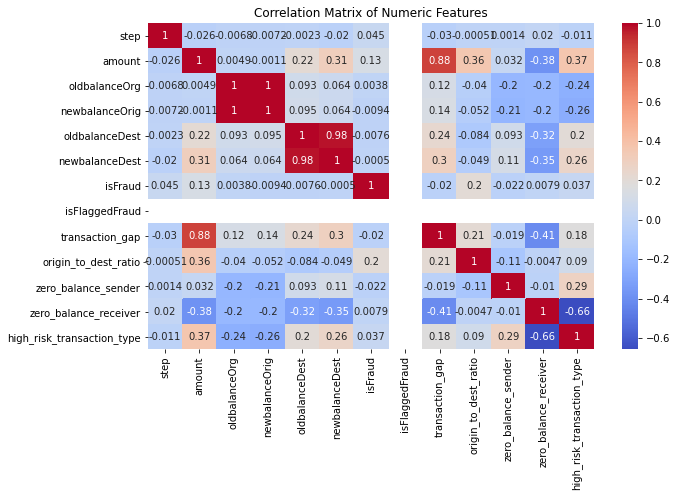

In [13]:
# Select only numeric columns manually
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [15]:
from scipy.stats import f_oneway

# Perform ANOVA for fraud rate across different channel types
groups = [df[df['channel_type'] == ch]['isFraud'] for ch in df['channel_type'].unique()]
f_stat, p_val = f_oneway(*groups)

print("F-statistic:", f_stat)
print("P-value:", p_val)

F-statistic: 1.5812585304376183
P-value: 0.20571652583946337


In [17]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['channel_type'], df['isFraud'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square test statistic:", chi2)
print("P-value:", p)


Chi-square test statistic: 3.162516570721543
P-value: 0.20571608574409675


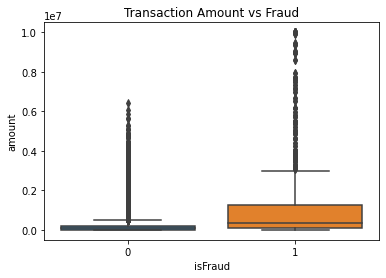

In [18]:
# Avg transaction amount by fraud
df.groupby('isFraud')['amount'].mean()

# Transaction amount distribution
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title("Transaction Amount vs Fraud")
plt.show()


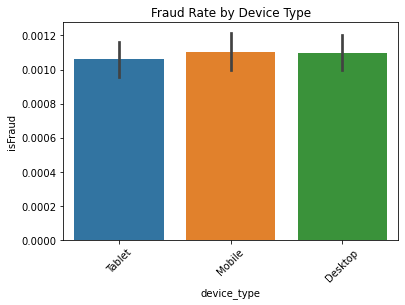

isFraud,0,1
channel_type,,
IB,99.883217,0.116783
MB,99.896648,0.103352
UPI,99.893428,0.106572


In [19]:
# Fraud by device_type
sns.barplot(x='device_type', y='isFraud', data=df)
plt.title("Fraud Rate by Device Type")
plt.xticks(rotation=45)
plt.show()

# Cross-tab with percentages
pd.crosstab(df['channel_type'], df['isFraud'], normalize='index') * 100


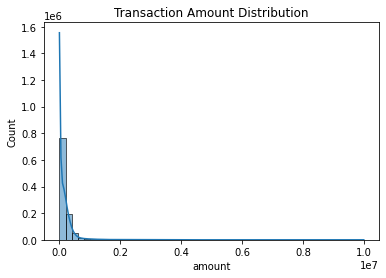

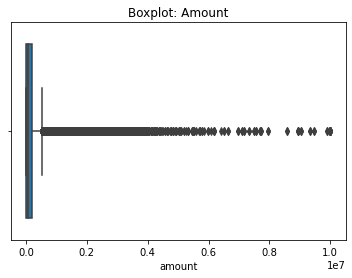

In [20]:
# Histogram + KDE for amount
sns.histplot(df['amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

# Boxplot for outlier detection
sns.boxplot(x=df['amount'])
plt.title("Boxplot: Amount")
plt.show()

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Prepare data
num_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=['isFraud'])
X_scaled = StandardScaler().fit_transform(num_df)

# VIF
vif = pd.DataFrame()
vif["feature"] = num_df.columns
vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif.sort_values('VIF', ascending=False))

C:\Users\yasho\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


                       feature           VIF
3               newbalanceOrig  2.484536e+08
2                oldbalanceOrg  2.424575e+08
7              transaction_gap  2.171901e+06
1                       amount  1.927517e+06
5               newbalanceDest  3.462228e+01
4               oldbalanceDest  3.281381e+01
11  high_risk_transaction_type  3.686080e+00
10       zero_balance_receiver  3.246332e+00
8         origin_to_dest_ratio  1.292651e+00
9          zero_balance_sender  1.214007e+00
0                         step  1.008920e+00
6               isFlaggedFraud           NaN


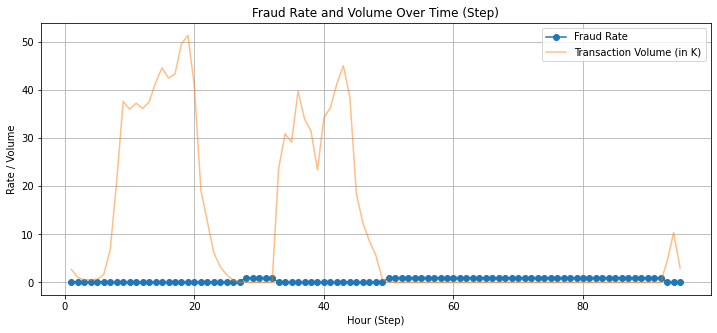

In [22]:
# Total transactions and frauds per hour
step_stats = df.groupby('step')['isFraud'].agg(['count', 'sum'])
step_stats.rename(columns={'count': 'total_txns', 'sum': 'fraud_txns'}, inplace=True)
step_stats['fraud_rate'] = step_stats['fraud_txns'] / step_stats['total_txns']

# Plot
plt.figure(figsize=(12, 5))
plt.plot(step_stats.index, step_stats['fraud_rate'], marker='o', label='Fraud Rate')
plt.plot(step_stats.index, step_stats['total_txns']/1000, label='Transaction Volume (in K)', alpha=0.5)
plt.title("Fraud Rate and Volume Over Time (Step)")
plt.xlabel("Hour (Step)")
plt.ylabel("Rate / Volume")
plt.legend()
plt.grid(True)
plt.show()

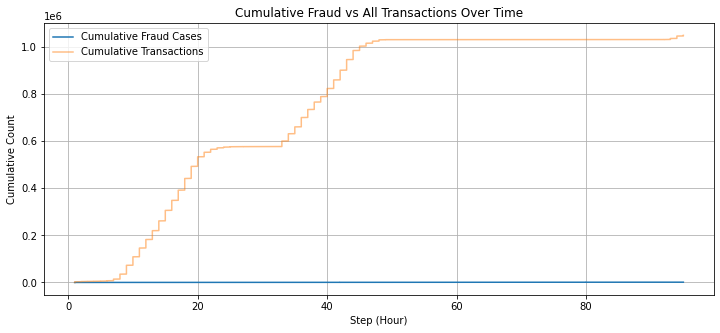

In [23]:
df_sorted = df.sort_values(by='step')
df_sorted['cum_fraud'] = df_sorted['isFraud'].cumsum()
df_sorted['cum_txns'] = range(1, len(df_sorted)+1)

plt.figure(figsize=(12, 5))
plt.plot(df_sorted['step'], df_sorted['cum_fraud'], label='Cumulative Fraud Cases')
plt.plot(df_sorted['step'], df_sorted['cum_txns'], label='Cumulative Transactions', alpha=0.5)
plt.title("Cumulative Fraud vs All Transactions Over Time")
plt.xlabel("Step (Hour)")
plt.ylabel("Cumulative Count")
plt.legend()
plt.grid(True)
plt.show()